# Определение уязвимых групп населения, кластеризация регионов.

### *Команда "PandaOne"* 

**Гипотеза : высокий уровень ВРП региона не влияет на уровень благополучия уязвимых слоев населения.**

### Очистка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Создадим словарь названий для унификации субъектов РФ
names = {'адыгея':'Республика Адыгея (Адыгея)','башкорт':'Республика Башкортостан',
'бурятия':'Республика Бурятия','дагестан':'Республика Дагестан','ингуш':'Республика Ингушетия',
'кабардино':'Кабардино-Балкарская Республика', 'карачаево':'Карачаево-Черкесская Республика',
'крым':'Республика Крым', 'республика саха':'Республика Саха (Якутия)', 'северная':'Республика Северная Осетия — Алания',
'татарстан':'Республика Татарстан (Татарстан)', 'тыва':'Республика Тыва (Тува)',
'чечня':'Чеченская Республика', 'чеченская':'Чеченская Республика',
'чуваш':'Чувашская Республика — Чувашия', 'кемеров':'Кемеровская область — Кузбасс',
'владимир':'Владимирская область', 'воронежская область':'Воронежская область',
'Bолгоградская область':'Волгоградская область',
'москва':'г. Москва', 'санкт':'г. Санкт-Петербург', 'севастополь':'г. Севастополь',
'еврейская':'Еврейская автономная область', 'ямало-ненецкий':'Ямало-Ненецкий автономный округ',
'ханты-мансийский':'Ханты-Мансийский автономный округ — Югра',
'ненецкий автономный округ (архангельская область)':'Ненецкий автономный округ',
'ненецкий авт. округ':'Ненецкий автономный округ', 'архангельская':'Архангельская область', 'чукотский авт. округ':'Чукотский автономный округ',
'тюменская':'Тюменская область', '\nненецкий':'Ненецкий автономный округ', 'ханты-мансийский ао':'Ханты-Мансийский автономный округ — Югра',
'ямало-ненецкий ао':'Ямало-Ненецкий автономный округ', 'тюменская область без автономного округа':'Тюменская область',
'ямало-ненецкий автономный округ':'Ямало-Ненецкий автономный округ'}
# Cоздадим функцию смены названия региона
def change_name(name):
    for n in names:
        if n in name.lower():
            return names[n]
    return name


Среднедушевые денежные доходы (в месяц), руб

In [3]:
# Среднедушевые денежные доходы (в месяц), руб
cri_df = pd.read_excel('social_russia_data/cash_real_income_wages_2015_2020.xlsx')
# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = cri_df[cri_df['region'].str.contains('федеральный округ|Федерация|район|числе')].index
cri_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
cri_df['region'] = cri_df['region'].apply(change_name)

# Назначим название региона индексом
cri_df.rename(columns={'region':"Регион"}, inplace=True)
cri_df["Регион"] = cri_df["Регион"].str.strip()
cri_df.set_index('Регион', inplace=True)


print(cri_df.shape)
cri_df.head()

(85, 6)


,2015,2016,2017,2018,2019,2020
Регион,,,,,,
Белгородская область,28043.0,29799.0,30342.0,30778.0,32352.0,32841.0
Брянская область,23428.0,24006.0,25107.0,26585.0,28371.0,28596.0
Владимирская область,22712.0,22365.0,23554.0,23539.0,25358.0,25922.0
Воронежская область,29366.0,29284.0,29498.0,30289.0,32022.0,32078.0
Ивановская область,22297.0,23676.0,24860.0,24503.0,25794.0,26277.0


 Детская смертность в сельской местности, чел


In [4]:


cmr_df = pd.read_excel('social_russia_data/child_mortality_rural_1990_2021.xls', skiprows=2)

# Удалим лишние колонки Оба пола и Сельское население - везде
cmr_df.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)
# Удалим столбцы до 2016 года
old_d = list(map(lambda x: str(x),range(1990,2016)))
cmr_df.drop(old_d, axis = 1, inplace=True)

# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = cmr_df[cmr_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
cmr_df.drop(fo, axis = 0, inplace=True)

# Выявим строки содержащие в себе устаревшие субъекты и исключим их
cmr_df = cmr_df.dropna(axis=0)
# Унифицируем названия регионов
cmr_df['Unnamed: 0'] = cmr_df['Unnamed: 0'].apply(change_name)

# назначим название региона индексом
cmr_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
cmr_df["Регион"] = cmr_df["Регион"].str.strip()
cmr_df.set_index('Регион', inplace=True)



print(cmr_df.shape)
print(cmr_df.head())


(84, 6)
                      2016  2017  2018  2019  2020  2021
Регион                                                  
Белгородская область  36.0  34.0  33.0  16.0  22.0  20.0
Брянская область      36.0  31.0  12.0  11.0  12.0  13.0
Владимирская область  28.0  17.0  22.0  15.0  10.0  14.0
Воронежская область   24.0  18.0  22.0   7.0  12.0  10.0
Ивановская область    15.0   4.0   7.0   9.0   3.0   4.0


Детская смертность в городе, чел

In [5]:

cmu_df = pd.read_excel('social_russia_data/child_mortality_urban_1990_2021.xls', skiprows=2)

# Удалим лишние колонки Оба пола и Сельское население - везде
cmu_df.drop(['Unnamed: 1', 'Unnamed: 2'], axis = 1, inplace=True)
# Удалим столбцы до 2016 года
old_d = list(map(lambda x: str(x),range(1990,2016)))
cmu_df.drop(old_d, axis = 1, inplace=True)

# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = cmu_df[cmu_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
cmu_df.drop(fo, axis = 0, inplace=True)
# Выявим строки содержащие в себе устаревшие субъекты и исключим их
cmu_df = cmu_df.dropna(axis=0)
# Унифицируем названия регионов
cmu_df['Unnamed: 0'] = cmu_df['Unnamed: 0'].apply(change_name)

# назначим название региона индексом
cmu_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
cmu_df["Регион"] = cmu_df["Регион"].str.strip()
cmu_df.set_index('Регион', inplace=True)

print(cmu_df.shape)
print(cmu_df.head())


(84, 6)
                      2016  2017  2018  2019  2020  2021
Регион                                                  
Белгородская область  72.0  43.0  40.0  23.0  25.0  34.0
Брянская область      67.0  65.0  33.0  26.0  29.0  14.0
Владимирская область  72.0  59.0  45.0  43.0  51.0  52.0
Воронежская область   96.0  90.0  77.0  74.0  58.0  73.0
Ивановская область    51.0  31.0  28.0  31.0  25.0  20.0


Число людей инвалидов, чел

In [6]:
dis_df = pd.read_csv('social_russia_data/disabled_total_by_age_2017_2022.csv')
# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = dis_df[dis_df['region'].str.contains('федеральный округ|Федерация|район|Байконур')].index
dis_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
dis_df['region'] = dis_df['region'].apply(change_name)

dis_df.rename(columns={'region':"Регион"}, inplace=True)
dis_df["Регион"] = dis_df["Регион"].str.strip()

# Сгруппируем по дате и региону общее количество людей
dis_df['date'] = pd.to_datetime(dis_df['date']).dt.year
dis_df = dis_df.groupby(['Регион','date'])['total'].sum().unstack()
dis_df

date,2017,2018,2019,2020,2021,2022
Регион,,,,,,
Алтайский край,1987350.0,2120203.0,2100077.0,2060817.0,1986766.0,646296.0
Амурская область,816315.0,797050.0,785693.0,766768.0,733732.0,236444.0
Архангельская область,1056888.0,1038542.0,1031766.0,1016584.0,978993.0,316492.0
Астраханская область,533426.0,525601.0,523200.0,520687.0,511039.0,167664.0
Белгородская область,2625755.0,2522995.0,2446166.0,2359129.0,2252362.0,723760.0
...,...,...,...,...,...,...
Ямало-Ненецкий автономный округ,161326.0,161661.0,162704.0,165063.0,166606.0,56076.0
Ярославская область,1324880.0,1273883.0,1229274.0,1183293.0,1122990.0,358243.0
г. Москва,12682541.0,12486572.0,12263791.0,11900696.0,11409205.0,3689032.0


Валовой региональный продукт на душу населения, руб

In [7]:
grp_df = pd.read_excel('social_russia_data/gross_regional_product_1996_2020.xls', skiprows=2)

# Удалим столбцы до 2016 года
old_d = list(map(lambda x: str(x),range(1996,2016)))
grp_df.drop(old_d, axis = 1, inplace=True)

# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = grp_df[grp_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
grp_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
grp_df['Unnamed: 0'] = grp_df['Unnamed: 0'].apply(change_name)
# Назначим название области индексом
grp_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
grp_df["Регион"] = grp_df["Регион"].str.strip()
grp_df.set_index('Регион', inplace=True)

print(grp_df.shape)
grp_df.head()

(85, 5)


,2016,2017,2018,2019,2020
Регион,,,,,
Белгородская область,501467.8,539720.5,588641.5,617426.5,646569.0
Брянская область,258752.7,280630.1,304547.1,332442.8,347204.5
Владимирская область,309713.7,325043.1,349856.4,394560.3,410443.6
Воронежская область,354657.9,374125.7,408140.7,431037.0,459629.5
Ивановская область,200504.4,208522.0,230325.5,249591.6,273821.5


Размер жилой площади в расчете на члена домохозяйства за 2020г , м2

In [8]:
hous_df = pd.read_excel('social_russia_data/housing_2020.xlsx')

# Выявим строки содержащие федеральный округ, федерация и район и исключим их
fo = hous_df[hous_df['Регион'].str.contains('федеральный округ|Федерация|район')].index
hous_df.drop(fo, axis = 0, inplace=True)
# Унифицируем названия регионов
hous_df['Регион'] = hous_df['Регион'].apply(change_name)

# Назначим название области индексом
hous_df["Регион"] = hous_df["Регион"].str.strip()
hous_df.set_index('Регион', inplace=True)
# Оставим только интересующий признак
square_liv = hous_df[['Размер жилой площади в расчете на члена домохозяйства']]

dif = list(set(square_liv.index).difference(set(grp_df.index)))
square_liv.drop(dif, axis = 0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13464\1498688609.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  square_liv.drop(dif, axis = 0, inplace=True)


Заболеваемость с диагнозом, установленным впервые в жизни, проживающих в районе обслуживания лечебного учреждения, на 100 тыс.человек населения

In [9]:
mad_df = pd.read_excel('social_russia_data/morbidity_2005_2020_age_disease.xls', skiprows=2)

# Выявим строки содержащие федеральный округ, федерация и район и исключим 
fo = mad_df[mad_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
mad_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
mad_df['Unnamed: 0'] = mad_df['Unnamed: 0'].apply(change_name)

# Назначим название области индексом
mad_df.rename(columns={'Unnamed: 0':"Регион",'Unnamed: 1':"Заболевания",'Unnamed: 2':"Группа"}, inplace=True)
mad_df["Регион"] = mad_df["Регион"].str.strip()
mad_df.set_index('Регион', inplace=True)
mad_df = mad_df[mad_df['Группа'] == 'Всего']

# Выделим датафрейм с общим показателем заболеваемости на 100тыс. человек населения за 2016г(только он попадает в выборку)
mad_all_df = mad_df[mad_df['Заболевания'].isin(['Все заболевания','Болезни системы кровообращения',\
    'Болезни органов дыхания','Болезни эндокринной системы, расстройства питания и нарушения обмена веществ'])].loc[:,['2016','Заболевания']]
mad_all_df = mad_all_df.dropna(axis=0)
mad_all_df = mad_all_df.groupby(['Регион','Заболевания'])['2016'].sum().unstack()
mad_all_df.rename(columns={'Все заболевания':'Заболеваемость на 100 тыс человек населения, чел.'}, inplace=True)

print(mad_all_df.shape)
display(mad_all_df.head())

(85, 4)


Заболевания,Болезни органов дыхания,Болезни системы кровообращения,"Болезни эндокринной системы, расстройства питания и нарушения обмена веществ","Заболеваемость на 100 тыс человек населения, чел."
Регион,,,,
Алтайский край,40416.4,5383.2,3885.0,112764.7
Амурская область,35518.0,2132.2,1147.3,83412.0
Архангельская область,44563.5,2452.0,1350.8,99842.1
Астраханская область,28101.5,2930.1,2029.4,64679.9
Белгородская область,27195.7,3995.8,813.6,74637.4


Процент людей, живущих за чертой бедности

In [10]:
ppr_df = pd.read_csv('social_russia_data/poverty_percent_by_regions_1992_2020.csv')

# Выявим строки содержащие федеральный округ, федерация и район и исключим 
fo = ppr_df[ppr_df['region'].str.contains('федеральный округ|Федерация|район')].index
ppr_df.drop(fo, axis = 0, inplace=True)
# Унифицируем названия регионов
ppr_df['region'] = ppr_df['region'].apply(change_name)

# Назначим название области индексом
ppr_df.rename(columns={'region':"Регион",'year':"Года"}, inplace=True)
ppr_df["Регион"] = ppr_df["Регион"].str.strip()
ppr_df.set_index('Регион', inplace=True)

# Перегруппируем  в датафрейм и удалим лишние столбцы
ppr_df = ppr_df.groupby(['Регион','Года'])['poverty_percent'].sum().unstack()
ppr_df.drop(ppr_df.columns[0:21],axis=1,inplace=True)

ppr_df

Года,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,17.8,17.5,17.4,17.6,17.5
Амурская область,17.0,16.7,15.6,15.7,15.2
Архангельская область,14.9,13.9,12.5,12.7,12.3
Астраханская область,16.1,15.5,15.1,15.5,15.6
Белгородская область,8.1,7.8,7.5,7.8,7.2
...,...,...,...,...,...
Ямало-Ненецкий автономный округ,7.1,6.1,5.8,5.5,4.8
Ярославская область,11.0,10.7,10.2,10.3,9.9
г. Москва,8.5,7.5,6.6,6.4,6.0


Численность населения, чел

In [11]:
pop_df = pd.read_excel('social_russia_data/corrected_population.xlsx')
# Удалим лишние колонки,строки - везде
pop_df.drop(pop_df.columns[1:18], axis = 1, inplace=True)
pop_df.drop([0], axis = 0, inplace=True)

# Выявим строки содержащие федеральный округ, федерация и район и исключим 
fo = pop_df[pop_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район|сельсовет|все|поссовет|Раздел|пункты')].index
pop_df.drop(fo, axis = 0, inplace=True)
# Выявим строки содержащие в себе устаревшие субъекты и исключим их
pop_df = pop_df.dropna(axis=0)
# Унифицируем названия регионов
pop_df['Unnamed: 0'] = pop_df['Unnamed: 0'].apply(change_name)


# Назначим название области индексом
pop_df.rename(columns={'Unnamed: 0':"Регион",'Unnamed: 18':"2016",'Unnamed: 19':"2017",'Unnamed: 20':"2018",'Unnamed: 21':"2019",\
    'Unnamed: 22':"2020"}, inplace=True)
pop_df.drop(['Unnamed: 23','Unnamed: 24'], axis = 1, inplace=True)
pop_df["Регион"] = pop_df["Регион"].str.strip()
pop_df.set_index('Регион', inplace=True)
# Выявим строки содержащие в себе лишние регионы и исключим их
old_d = list(set(pop_df.index).difference(set(ppr_df.index)))
pop_df.drop(old_d, axis = 0, inplace=True)

pop_df.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Белгородская область,1550137,1552865,1549876,1547418,1549151
Брянская область,1225741,1220530,1210982,1200187,1192491
Владимирская область,1397168,1389599,1378337,1365805,1358416
Воронежская область,2333477,2335408,2333768,2327821,2324205
Ивановская область,1029838,1023170,1014646,1004180,997135


Расходы на социальную политику,%

In [12]:
wes_df = pd.read_excel('social_russia_data/welfare_expense_share_2015_2020.xlsx')

# выявим строки содержащие федеральный округ, федерация и район
fo = wes_df[wes_df['region'].str.contains('федеральный округ|Федерация|район')].index
wes_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
wes_df['region'] = wes_df['region'].apply(change_name)

# назначим название области индексом
wes_df.rename(columns={'region':"Регион"}, inplace=True)
wes_df["Регион"] = wes_df["Регион"].str.strip()
wes_df.set_index('Регион', inplace=True)

print(wes_df.shape)
wes_df.head()

(85, 6)


,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Регион,,,,,,
Белгородская область,11.3,11.8,16.4,15.6,13.8,16.1
Брянская область,22.0,26.6,24.7,23.7,20.7,23.1
Владимирская область,18.1,18.0,24.0,23.4,23.4,26.0
Воронежская область,15.2,15.4,22.8,20.9,19.0,21.6
Ивановская область,18.1,28.9,28.7,27.0,25.1,25.1


Оборот розничной торговли на душу населения, руб

In [13]:
rtc_df = pd.read_excel('social_russia_data/retail_turnover_per_capita_2000_2021.xls', skiprows=2)

# Удалим ненужные столбцы и строки
rtc_df.drop([0], axis=0, inplace=True)
rtc_df.drop(rtc_df.columns[1:18], axis=1,inplace=True)

# выявим строки содержащие федеральный округ, федерация и район
fo = rtc_df[rtc_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
rtc_df.drop(fo, axis = 0, inplace=True)

# Выявим строки содержащие в себе устаревшие субъекты и исключим их
rtc_df = rtc_df.dropna(axis=0)

# Унифицируем названия регионов
rtc_df['Unnamed: 0'] = rtc_df['Unnamed: 0'].apply(change_name)

# назначим название области индексом
rtc_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
rtc_df["Регион"] = rtc_df["Регион"].str.strip()
rtc_df.set_index('Регион', inplace=True)

rtc_df

,2016,2017,2018,2019,2020,2021
Регион,,,,,,
Белгородская область,192504,203298,217059,230704,237076,259151
Брянская область,179767,192775,209987,225818,225643,257679
Владимирская область,143643,153088,164519,175251,177680,207670
Воронежская область,208638,221302,236953,251882,252416,296665
Ивановская область,143568,153993,163290,178517,180314,211546
...,...,...,...,...,...,...
Амурская область,191523,202038,214688,231113,245233,276635
Магаданская область,202541,213558,226312,240162,245817,289171
Сахалинская область,276476,289573,303112,327601,338787,364356


Малоимущие группы населения, %

In [14]:
ps_17_df = pd.read_excel('social_russia_data/poverty_socdem_2017.xls',skiprows=2)
ps_18_df = pd.read_excel('social_russia_data/poverty_socdem_2018.xls',skiprows=2)
ps_19_df = pd.read_excel('social_russia_data/poverty_socdem_2019.xls',skiprows=2)
ps_20_df = pd.read_excel('social_russia_data/poverty_socdem_2020.xls',skiprows=2)
ps_20_df = ps_20_df.fillna(0)

# выявим строки содержащие федеральный округ, федерация и район, назначим название области индексом
def clean_df(data_pov):
    fo = data_pov[data_pov['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
    data_pov.drop(fo, axis = 0, inplace=True)
    data_pov['Unnamed: 0'] = data_pov['Unnamed: 0'].apply(change_name)
    data_pov.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
    data_pov["Регион"] = data_pov["Регион"].str.strip()
    data_pov.set_index('Регион', inplace=True)
    return data_pov
# применим функцию к каждому датафрейму и заполним пустые значения
list_df = [ps_17_df,ps_18_df,ps_19_df,ps_20_df]
for i in list_df:
    clean_df(i)
    i = i.fillna(0)
    
ps_17_df

,Все население,Дети в возрасте до 16 лет,Население старше трудоспособного возраста,Население трудоспособного возраста
Регион,,,,
Белгородская область,100,43.4,11.8,44.8
Брянская область,100,42.9,4.9,52.2
Владимирская область,100,34.8,8.6,56.6
Воронежская область,100,38.6,5.9,55.6
Ивановская область,100,33.2,10.9,55.9
...,...,...,...,...
Амурская область,100,39.9,6.0,54.1
Магаданская область,100,32.2,14.8,53.0
Сахалинская область,100,36.4,6.4,57.1


In [15]:
# Создадим признак % малоимущих детей
ps_17_deti = ps_17_df.loc[:, ['Дети в возрасте до 16 лет']]
ps_18_deti = ps_18_df.loc[:, ['Дети в возрасте до 16 лет']]
ps_19_deti = ps_19_df.loc[:, ['Дети в возрасте до 16 лет']]
ps_20_deti = ps_20_df.loc[:, ['Дети в возрасте до 16 лет']]

ps_17_deti.rename(columns={'Дети в возрасте до 16 лет':'2017'},inplace=True)
ps_18_deti.rename(columns={'Дети в возрасте до 16 лет':'2018'},inplace=True)
ps_19_deti.rename(columns={'Дети в возрасте до 16 лет':'2019'},inplace=True)
ps_20_deti.rename(columns={'Дети в возрасте до 16 лет':'2020'},inplace=True)

ps_deti = ps_17_deti.merge(ps_18_deti,on=['Регион'],how='left')
ps_deti = ps_deti.merge(ps_19_deti,on=['Регион'],how='left')
ps_deti = ps_deti.merge(ps_20_deti,on=['Регион'],how='left')
ps_deti

,2017,2018,2019,2020
Регион,,,,
Белгородская область,43.4,44.8,0.0,0.0
Брянская область,42.9,40.3,37.5,44.8
Владимирская область,34.8,48.9,34.8,0.0
Воронежская область,38.6,32.6,45.2,28.5
Ивановская область,33.2,31.2,47.5,0.0
...,...,...,...,...
Амурская область,39.9,40.6,33.9,38.4
Магаданская область,32.2,30.7,45.8,0.0
Сахалинская область,36.4,32.9,44.9,0.0


In [16]:
# Создадим признак % малоимущих пенсионеров
ps_17_pens = ps_17_df.loc[:, ['Население старше трудоспособного возраста']]
ps_18_pens = ps_18_df.loc[:, ['Население старше трудоспособного возраста']]
ps_19_pens = ps_19_df.loc[:, ['Население старше трудоспособного возраста']]
ps_20_pens = ps_20_df.loc[:, ['Население старше трудоспособного возраста']]

ps_17_pens.rename(columns={'Население старше трудоспособного возраста':'2017'},inplace=True)
ps_18_pens.rename(columns={'Население старше трудоспособного возраста':'2018'},inplace=True)
ps_19_pens.rename(columns={'Население старше трудоспособного возраста':'2019'},inplace=True)
ps_20_pens.rename(columns={'Население старше трудоспособного возраста':'2020'},inplace=True)

ps_pens = ps_17_pens.merge(ps_18_pens,on=['Регион'],how='left')
ps_pens = ps_pens.merge(ps_19_pens,on=['Регион'],how='left')
ps_pens = ps_pens.merge(ps_20_pens,on=['Регион'],how='left')
ps_pens

,2017,2018,2019,2020
Регион,,,,
Белгородская область,11.8,12.9,0.0,0.0
Брянская область,4.9,1.8,5.1,3.7
Владимирская область,8.6,8.3,4.8,0.0
Воронежская область,5.9,8.0,5.4,2.3
Ивановская область,10.9,9.5,5.0,0.0
...,...,...,...,...
Амурская область,6.0,4.6,7.2,4.7
Магаданская область,14.8,11.5,0.0,0.0
Сахалинская область,6.4,4.3,12.1,0.0


In [17]:
# Создадим признак % малоимущих трудоспособных
ps_17_trud = ps_17_df.loc[:, ['Население трудоспособного возраста']]
ps_18_trud = ps_18_df.loc[:, ['Население трудоспособного возраста']]
ps_19_trud = ps_19_df.loc[:, ['Население трудоспособного возраста']]
ps_20_trud = ps_20_df.loc[:, ['Население трудоспособного возраста']]

ps_17_trud.rename(columns={'Население трудоспособного возраста':'2017'},inplace=True)
ps_18_trud.rename(columns={'Население трудоспособного возраста':'2018'},inplace=True)
ps_19_trud.rename(columns={'Население трудоспособного возраста':'2019'},inplace=True)
ps_20_trud.rename(columns={'Население трудоспособного возраста':'2020'},inplace=True)

ps_trud = ps_17_trud.merge(ps_18_trud,on=['Регион'],how='left')
ps_trud = ps_trud.merge(ps_19_trud,on=['Регион'],how='left')
ps_trud = ps_trud.merge(ps_20_trud,on=['Регион'],how='left')
ps_trud

,2017,2018,2019,2020
Регион,,,,
Белгородская область,44.8,42.3,0.0,0.0
Брянская область,52.2,57.9,57.4,51.6
Владимирская область,56.6,42.8,60.4,0.0
Воронежская область,55.6,59.4,49.4,69.2
Ивановская область,55.9,59.3,47.5,0.0
...,...,...,...,...
Амурская область,54.1,54.8,58.9,56.9
Магаданская область,53.0,57.8,54.2,0.0
Сахалинская область,57.1,62.8,43.0,0.0


Объем отгруженных товаров собственного производства, выполненных работ, услуг собственными силами, по видам деятельности (тыс. р. за год)

In [18]:
rep_df = pd.read_csv('social_russia_data/regional_production_2017_2020.csv')

# Выявим строки содержащие федеральный округ, федерация и район и исключим 
fo = rep_df[rep_df['region'].str.contains('федеральный округ|Федерация|район')].index
rep_df.drop(fo, axis = 0, inplace=True)
# Унифицируем названия регионов
rep_df['region'] = rep_df['region'].apply(change_name)
# назначим название области индексом
rep_df.rename(columns={'region':"Регион"}, inplace=True)
rep_df["Регион"] = rep_df["Регион"].str.strip()
rep_df.set_index('Регион', inplace=True)

# Выделим датафрейм с показателем по добыче полезных ископаемых
rep_mining_df = rep_df[rep_df['production_field'] == 'ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по обрабатывающим производствам
rep_manu_df = rep_df[rep_df['production_field'] == 'ОБРАБАТЫВАЮЩИЕ ПРОИЗВОДСТВА'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по промышленности
rep_indust_df = rep_df[rep_df['production_field'] == 'Промышленное производство (промышленность)'].loc[:,'2017':'2020']
# Выделим датафрейм с показателем по обеспечения электроэнергией
rep_electr_df = rep_df[rep_df['production_field'] == 'ОБЕСПЕЧЕНИЕ ЭЛЕКТРИЧЕСКОЙ ЭНЕРГИЕЙ, ГАЗОМ И ПАРОМ; КОНДИЦИОНИРОВАНИЕ ВОЗДУХА'].loc[:,'2017':'2020']

#Переведем значения в руб
rep_electr_df *1000
rep_manu_df *1000
rep_indust_df *1000
rep_mining_df *1000
rep_mining_df.head()

,2017,2018,2019,2020
Регион,,,,
Белгородская область,116588313.5,148863422.7,178389894.9,189803813.7
Брянская область,277427.7,261549.5,338027.3,310665.9
Владимирская область,4003911.4,5005218.9,5425671.9,4965110.5
Воронежская область,6282741.9,7726219.1,9026582.6,9230600.5
Ивановская область,754680.2,971838.3,1237760.3,1170505.2


Численность безработных, чел

In [19]:
unemp_df = pd.read_excel('social_russia_data/bezrabotnye_2015-2021.xlsx',skiprows=3)

# выявим строки содержащие федеральный округ, федерация и район
fo = unemp_df[unemp_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
unemp_df.drop(fo, axis = 0, inplace=True)
# Унифицируем названия регионов
unemp_df['Unnamed: 0'] = unemp_df['Unnamed: 0'].apply(change_name)
# назначим название области индексом
unemp_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
unemp_df["Регион"] = unemp_df["Регион"].str.strip()
unemp_df.set_index('Регион', inplace=True)
# Переведем значения из тыс. чел
unemp_df = unemp_df*1000

unemp_df

,2015,2016,2017,2018,2019,2020,2021
Регион,,,,,,,
Белгородская область,32811.0,32537.0,32140.0,32585.0,31943.0,40583.0,34501.0
Брянская область,28973.0,28660.0,27012.0,23989.0,22457.0,23287.0,20144.0
Владимирская область,42266.0,40960.0,35349.0,33825.0,29036.0,39550.0,27507.0
Воронежская область,52006.0,52258.0,51169.0,43293.0,41869.0,50370.0,45255.0
Ивановская область,30924.0,29875.0,25417.0,22140.0,19463.0,27887.0,23669.0
...,...,...,...,...,...,...,...
Амурская область,24029.0,24587.0,24288.0,22775.0,21878.0,24033.0,20731.0
Магаданская область,4002.0,3974.0,4783.0,4437.0,3930.0,4852.0,4238.0
Сахалинская область,17752.0,17638.0,16457.0,14756.0,14213.0,15232.0,14407.0


Рождаемость в год, чел

In [20]:
borned_df = pd.read_excel('social_russia_data/borned.xls',skiprows=2)

# выявим строки содержащие федеральный округ, федерация и район
fo = borned_df[borned_df['Unnamed: 0'].str.contains('федеральный округ|Федерация|район')].index
borned_df.drop(fo, axis = 0, inplace=True)

# Унифицируем названия регионов
borned_df['Unnamed: 0'] = borned_df['Unnamed: 0'].apply(change_name)

# назначим название области индексом
borned_df.rename(columns={'Unnamed: 0':"Регион"}, inplace=True)
borned_df["Регион"] = borned_df["Регион"].str.strip()
borned_df.set_index('Регион', inplace=True)

borned_df.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Белгородская область,17247.0,15093.0,14317.0,13183.0,12294.0
Брянская область,13364.0,11548.0,11129.0,9956.0,9511.0
Владимирская область,15654.0,13356.0,12693.0,11101.0,10072.0
Воронежская область,24936.0,22370.0,21470.0,19576.0,19073.0
Ивановская область,11147.0,9885.0,9117.0,7938.0,7525.0


Заболеваемость с впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс.  населения

In [21]:
alco_df = pd.read_excel('social_russia_data/drug_alco.xlsx',sheet_name='alco')
alco_1718 = pd.read_excel('social_russia_data/drug_alco.xlsx',sheet_name='alco1718')

# выявим строки содержащие федеральный округ, федерация и район, назначим название области индексом
def clean_r_df(data_pov):
    fo = data_pov[data_pov['region'].str.contains('федеральный округ|Федерация|район|Главное')].index
    data_pov.drop(fo, axis = 0, inplace=True)
    data_pov['region'] = data_pov['region'].apply(change_name)
    data_pov.rename(columns={'region':"Регион"}, inplace=True)
    data_pov["Регион"] = data_pov["Регион"].str.strip()
    data_pov.set_index('Регион', inplace=True)
    return data_pov
# применим функцию к каждому датафрейму и заполним пустые значения
list_df = [alco_df, alco_1718]
for i in list_df:
    clean_r_df(i)

alco_df = alco_df.merge(alco_1718, on='Регион', how='right')
dif = list(set(alco_df.index).difference(set(borned_df.index)))
alco_df.drop(dif, axis = 0, inplace=True)

Заболеваемость с впервые в жизни установленным диагнозом наркомании на 100 тыс.  населения

In [22]:
drug_df = pd.read_excel('social_russia_data/drug_alco.xlsx',sheet_name='drugs')
drug_1718 = pd.read_excel('social_russia_data/drug_alco.xlsx',sheet_name='drug1718')

# применим функцию очистки к каждому датафрейму и заполним пустые значения
list_df = [drug_df,drug_1718]
for i in list_df:
    clean_r_df(i)

drug_df = drug_df.merge(drug_1718, on='Регион', how='right')
drug_df = drug_df.fillna(0)

dif = list(set(drug_df.index).difference(set(borned_df.index)))
drug_df.drop(dif, axis = 0, inplace=True)


### Преобразование показателей и объединение в единый датафрейм

Вычислим удельные показатели на душу населения, где это возможно, и приведем показатели к средним значениям за 5 лет.

In [23]:
# Среднегодовая численность населения, чел
pop_mean = pop_df.mean(axis=1)
# Среднедушевые денежные доходы, руб
cri_mean = cri_df.loc[:,2016:2020].mean(axis=1)
# Среднегодовая детская смертность на душу населения, чел
cm = cmr_df + cmu_df 
cm = cm / pop_df
cm_mean = cm.loc[:,'2016':'2020'].mean(axis=1)
# Среднегодовое число людей инвалидов , чел
dis = dis_df.loc[:,2017:2020].mean(axis=1)
dis_mean = dis / pop_mean
# Среднегодовой валовой региональный продукт на душу населения, руб
grp_mean = grp_df.mean(axis=1)
# Среднегодовой процент людей, живущих за чертой бедности
ppr_mean = ppr_df.mean(axis=1)
# Среднегодовой процент расходов на социальную политику
wes_mean = wes_df.loc[:,2016.0:2020.0].mean(axis=1)
# Средегодовой оборот розничной торговли на душу населения, руб
rtc_mean = rtc_df.loc[:,'2016':'2020'].mean(axis=1)

# Средегодовой % малоимущих детей, доля
ps_deti_mean = ps_deti.mean(axis=1)
# Средегодовой % малоимущих пенсионеров, доля
ps_pens_mean = ps_pens.mean(axis=1)
# Средегодовой % малоимущих трудоспособных людей, доля
ps_trud_mean = ps_trud.mean(axis=1)


In [24]:
# Средегодовой объем производимой добычи полезных ископаемых, руб на душу населения
rep_mining_per = rep_mining_df / pop_df.loc[:,'2017':'2020']
rep_mining_mean = rep_mining_per.mean(axis=1).fillna(0)
# Средегодовой объем производимой промышленности, руб на душу населения
rep_indust_per = rep_indust_df / pop_df.loc[:,'2017':'2020']
rep_indust_mean = rep_indust_per.mean(axis=1).fillna(0)
# Средегодовой объем производимого обрабатывающего производства, руб на душу населения
rep_manu_per = rep_manu_df / pop_df.loc[:,'2017':'2020']
rep_manu_mean = rep_manu_per.mean(axis=1).fillna(0)
# Средегодовой объем производимой электрической энергии, газом и паром, руб на душу населения
rep_electr_per = rep_electr_df / pop_df.loc[:,'2017':'2020']
rep_electr_mean = rep_electr_per.mean(axis=1).fillna(0)

In [25]:
# Среднегодовая численность безработных, чел 
unemp = unemp_df.loc[:,2016:2020].mean(axis=1)
unemp_mean = unemp / pop_mean
# Среднегодовая рождаемость, чел 
borned_per = borned_df / pop_df
borned_mean = borned_per.mean(axis=1)
# Среднегодовая заболеваемость впервые в жизни установленным диагнозом алкоголизма и алкогольного психоза на 100 тыс.  населения, чел 
alco_mean = alco_df.loc[:,2016.0:2018.0].mean(axis=1)
# Среднегодовая заболеваемость впервые в жизни установленным диагнозом наркомании на 100 тыс.  населения, чел 
drug_mean = drug_df.loc[:,2016.0:2018.0].mean(axis=1)

In [26]:
# Объединим все признаки в итоговом датасете 
result = pd.concat([pop_mean, cri_mean, cm_mean, dis_mean, grp_mean, ppr_mean, wes_mean, rtc_mean, ps_deti_mean, ps_pens_mean, ps_trud_mean,
rep_mining_mean, rep_indust_mean, rep_manu_mean, rep_electr_mean, unemp_mean, borned_mean,drug_mean,alco_mean,mad_all_df,square_liv],\
    axis=1).fillna(0)
result.rename(columns={0:'population', 1:'cash_real', 2:'child_mort', 3:'disabled', 4:'grp', 5:'poverty_%', 6:'wes_%', 7:'retail', 8:'poverty_deti_%',
9:'poverty_pens_%', 10:'poverty_trud_%', 11:'rep_mining', 12:'rep_industry', 13:'rep_manufacture', 14:'rep_electro', 15:'unemployed', 16:'borned',
17:'drug', 18:'alco','Болезни органов дыхания':'d_resp','Болезни системы кровообращения':'d_blood',
'Болезни эндокринной системы, расстройства питания и нарушения обмена веществ':'d_endo',
'Заболеваемость на 100 тыс человек населения, чел.':'d_all',
'Размер жилой площади в расчете на члена домохозяйства':'square_liv'})
result.columns=['population','cash_real','child_mort','disabled','grp','poverty_%','wes_%','retail','poverty_deti_%',
'poverty_pens_%','poverty_trud_%','rep_mining','rep_industry','rep_manufacture','rep_electro','unemployed','borned','drug','alco','d_resp','d_blood',
'd_endo','d_all','square_liv']
result

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1549889.4,31222.4,0.000044,1.605606,578765.06,7.68,14.74,216128.2,22.050,6.175,...,17.286679,0.021910,0.009308,2.366667,44.200000,27195.7,3995.8,813.6,74637.4,17.8
Брянская область,1209986.2,26533.0,0.000053,1.066740,304715.44,13.92,23.76,206798.0,41.375,3.875,...,14.387151,0.020728,0.009165,10.000000,94.100000,33294.4,3201.2,1641.5,77439.0,24.1
Владимирская область,1377865.0,24147.6,0.000052,1.099172,357923.42,13.20,22.96,162836.2,29.625,5.425,...,26.355518,0.025942,0.009113,10.466667,69.166667,46461.1,2715.0,1265.2,94163.6,0.0
Воронежская область,2330935.8,30634.2,0.000041,1.117401,405518.16,8.94,19.94,234238.2,36.225,5.400,...,46.790874,0.020503,0.009216,21.933333,82.233333,23444.6,4876.8,1589.2,55009.9,0.0
Ивановская область,1013793.8,25022.0,0.000040,0.935000,232553.00,14.36,26.96,163936.4,27.975,6.350,...,29.865358,0.024617,0.008984,5.733333,82.166667,47678.7,2858.0,1676.5,88473.5,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,797820.6,31385.8,0.000058,0.992023,451290.98,16.04,24.74,216919.0,38.200,5.625,...,50.694971,0.029471,0.011113,20.666667,99.000000,35518.0,2132.2,1147.3,83412.0,17.3
Магаданская область,143477.8,60442.2,0.000040,0.419708,1392228.04,10.32,12.04,225678.0,27.175,6.575,...,117.042842,0.030633,0.010057,9.400000,152.466667,29275.3,1453.4,1146.6,67012.9,13.8
Сахалинская область,488542.6,54707.6,0.000050,0.528813,2029395.38,8.70,14.26,307109.8,28.550,5.700,...,37.494058,0.032053,0.012549,17.866667,120.200000,38148.9,2228.6,1302.9,83995.5,17.2


### Анализ данных и визуализация

*Data Dictionary* :
- population - Численность населения,чел
- cash_real - Среднедушевые денежные доходы, руб
- child_mort - Детская смертность на душу населения , чел
- borned - Рождаемость на душу населения, чел
- disabled - Число инвалидов на душу населения , чел
- grp - Валовый региональный продукт на душу населения, руб
- poverty_% - Люди ,живущие за чертой бедности, % 
- wes_% - Расходы на социальную политику, %
- retail - Оборот розничной торговли на душу населения, руб
- poverty_deti_% - Малоимущие дети, доля % 
- poverty_pens_% - Малоимущие пенсионеры, доля %
- poverty_trud_% - Малоимущие трудоспособные, доля %
- rep_mining - объем производимой добычи полезных ископаемых на душу населения, руб
- rep_industry - объем производимой промышленности на душу населения, руб
- rep_manufacture - объем производимого обрабатывающего производства на душу населения, руб
- rep_electro - объем производимой электрической энергии, газом и паром на душу населения, руб
- unemployed - Численность безработных на душу населения, чел
- drug - заболеваемость впервые в жизни установленным диагнозом наркомании на 100 тыс.  населения, чел
- alco - Заболеваемость впервые в жизни установленным диагнозом алкоголизма на 100 тыс.  населения, чел
- d_resp - Заболеваемость ”болезни органов дыхания”, на 100 тыс человек населения, чел.
- d_blood - Заболеваемость ”Болезни системы кровообращения”, на 100 тыс человек населения, чел.
- d_endo - Заболеваемость ”Болезни эндокринной системы, расстройства питания и нарушения обмена веществ”, на 100 тыс человек населения, чел
- d_all - Заболеваемость у пациентов с диагнозом, установленным впервые в жизни, на 100 тыс человек населения, чел.
- square_liv - Размер жилой площади в расчете на члена домохозяйства, м2

Приведем описательные статистики показателей

In [27]:
result.describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.752282e+06,30574.698824,0.000062,0.908711,6.253382e+05,14.478588,21.252706,184201.312941,37.328235,5.945000,...,39.195093,0.031703,0.011059,9.846275,69.103922,36133.681176,3119.756471,1420.935294,79982.394118,16.321176
std,1.803117e+06,13137.429007,0.000029,0.261935,8.818551e+05,5.133862,4.426399,51967.616122,6.467892,2.037373,...,30.178393,0.016847,0.002384,9.432301,38.193213,9801.407789,962.750164,522.536177,17440.366421,4.292632
min,4.394240e+04,16234.600000,0.000000,0.301876,1.345015e+05,5.860000,6.480000,49174.200000,12.625000,0.675000,...,2.414834,0.009411,0.005609,0.000000,0.000000,14313.900000,1357.300000,598.900000,44792.000000,0.000000
25%,7.469498e+05,23454.800000,0.000048,0.766395,3.047154e+05,10.720000,19.940000,152320.600000,34.925000,4.925000,...,20.881114,0.023258,0.009678,4.866667,46.966667,29633.500000,2486.200000,1102.200000,67012.900000,15.500000
50%,1.175278e+06,26939.600000,0.000053,0.913513,4.270128e+05,13.940000,21.980000,180102.800000,38.875000,5.625000,...,32.716935,0.027362,0.010760,7.833333,63.500000,34749.200000,2894.300000,1346.600000,77439.000000,16.900000
75%,2.348500e+06,31222.400000,0.000068,1.079202,5.322688e+05,16.600000,24.220000,216919.000000,40.875000,7.075000,...,46.790874,0.035786,0.011706,11.166667,83.433333,41421.500000,3616.800000,1700.200000,89949.900000,18.100000
max,1.250212e+07,80159.800000,0.000177,1.605606,6.408588e+06,34.760000,28.480000,380821.800000,47.700000,10.975000,...,198.939139,0.142904,0.021028,68.400000,264.600000,70452.800000,6010.800000,3885.000000,138231.700000,27.800000


Краткие выводы по статистике:
- Максимальный среднедушевой доход 80 тыс. руб, минимальный 16 тыс.
- В среднем 15% населения живут за чертой бедности, из них  37% дети.
- Минимальные траты на социальную политику в регионах составляет 7%, максимальный 30%. 

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

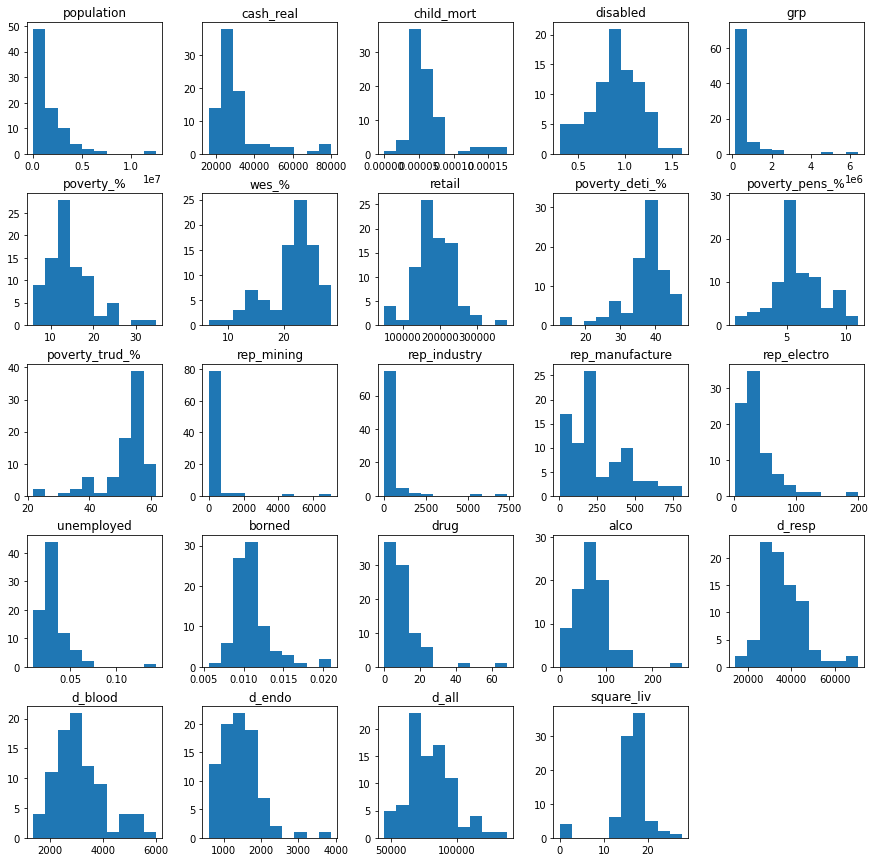

In [29]:
# Визуализируем распределение признаков
result.hist(figsize = (15,15), grid = False);
plt.show()

Не все гистограммы имеют симметричный вид, что подтверждает наличие нескольких групп признаков.

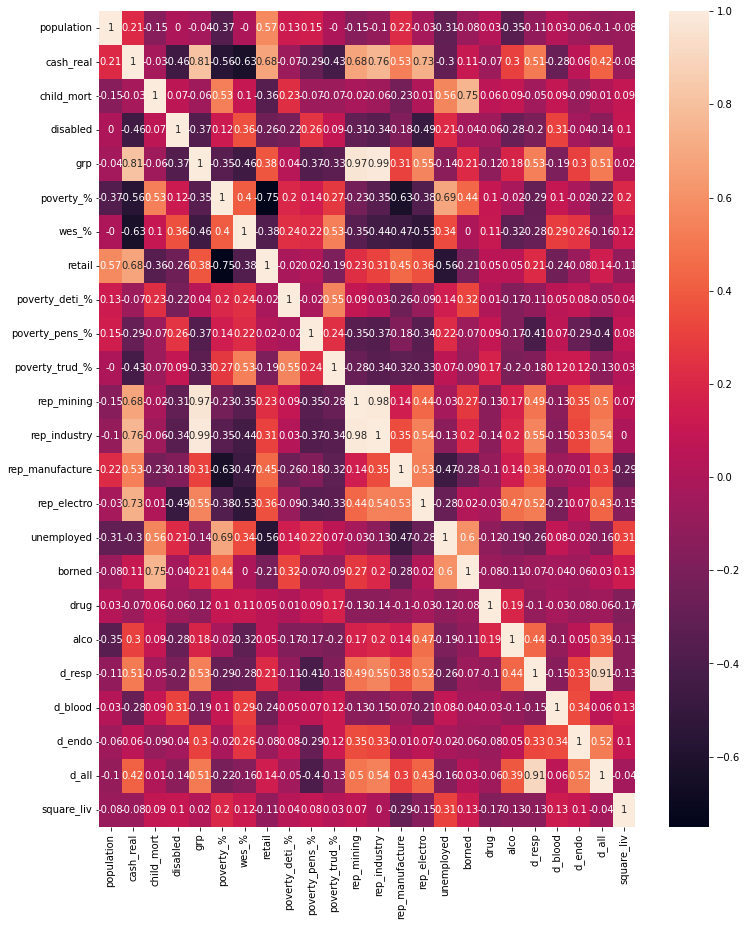

In [30]:
# Создадим тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных
plt.figure(figsize=(12, 15))
sns.heatmap(result.corr().round(decimals=2), annot=True)
plt.show()

Показатели объемов добычи полезных ископаемых и промышленности и врп (rep_mining и rep_industry, grp) имеют сильную линейную зависимость со значением корреляции 0,98 и 0,99, один из таких признаков можно убрать для обучения, так как они  практически одинаковые. Напротив признаки бедности и оборота розничной торговли (poverty_%, retail) имеют обратную корреляцию со значением -0,75. Кроме того видно, что ВРП (grp) имеет достаточную обратную корреляцию (-0,46) с расходами на соц. политику, и практически не имеет зависимости с болезнями, безработными и малоимущим населением. 

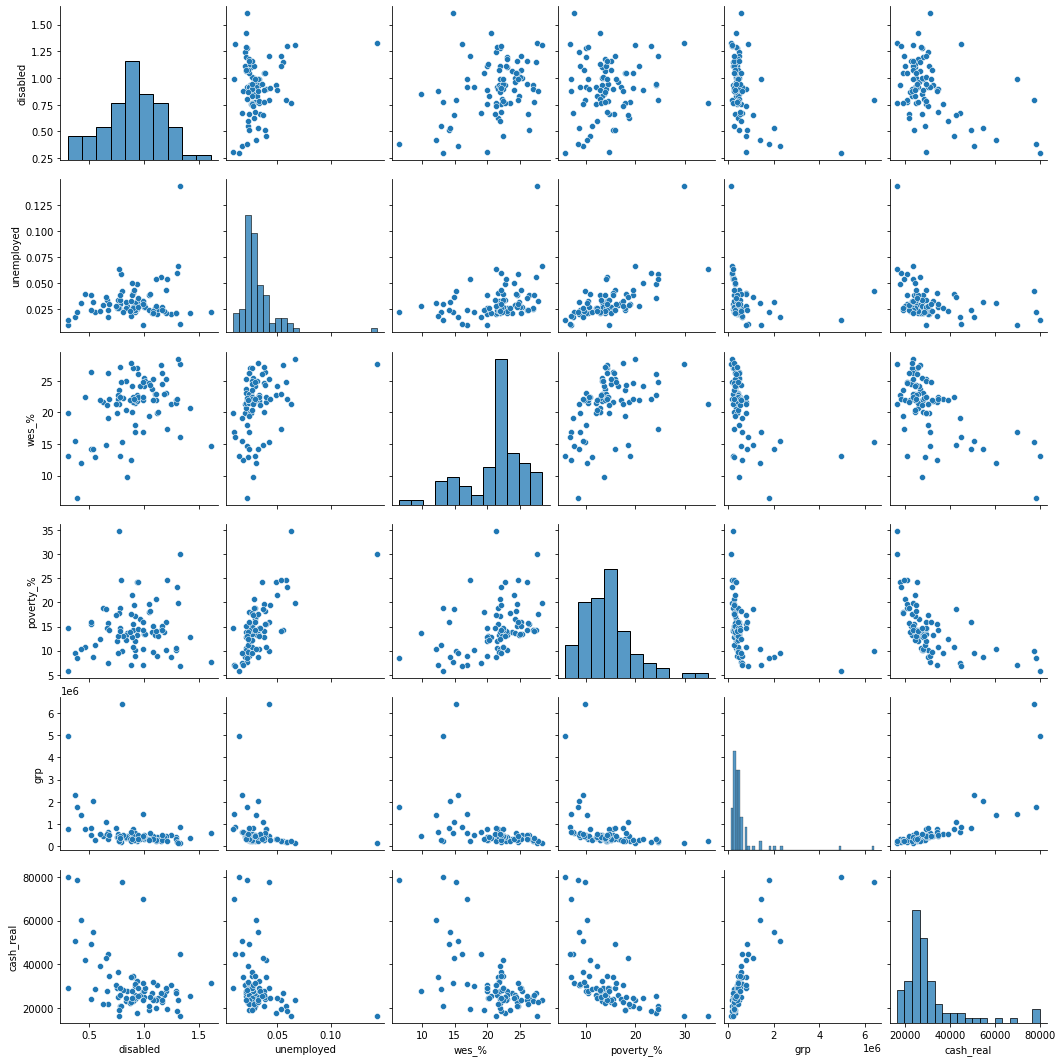

In [31]:
# Создадим матрицу диаграмм разброса для признаков описывающих бедные слои населения и врп с доходами 
sns.pairplot(result, vars=['disabled','unemployed','wes_%','poverty_%','grp','cash_real'])

Как и ранее на тепловой карте корреляции, видно, что  пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.

Перед кластеризацией выполним стандартизацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных.

In [32]:
from sklearn import preprocessing
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

result_s = s_scaler.fit_transform(result)

# Преобразуем промежуточный датасет 
result_s = pd.DataFrame(result_s, columns=['population','cash_real','child_mort','disabled','grp','poverty_%','wes_%','retail','poverty_deti_%',
'poverty_pens_%','poverty_trud_%','rep_mining','rep_industry','rep_manufacture','rep_electro','unemployed','borned','drug','alco','d_resp','d_blood',
'd_endo','d_all','square_liv'], index=result.index)
result_s

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,-0.112912,0.049595,-0.596219,2.676351,-0.053126,-1.332123,-1.480065,0.618007,-2.376185,0.113560,...,-0.730272,-0.584715,-0.739064,-0.797684,-0.655921,-0.917320,0.915339,-1.169182,-0.308291,0.346547
Брянская область,-0.302540,-0.309473,-0.299811,0.606894,-0.365735,-0.109450,0.569803,0.437403,0.629383,-1.022044,...,-0.826922,-0.655252,-0.799224,0.016394,0.658348,-0.291400,0.085097,0.424609,-0.146699,1.822888
Владимирская область,-0.208882,-0.492124,-0.319109,0.731447,-0.305041,-0.250528,0.387996,-0.413564,-1.198065,-0.256745,...,-0.427981,-0.343976,-0.821052,0.066163,0.001653,1.059920,-0.422912,-0.299806,0.817951,-3.824702
Воронежская область,0.322823,0.004556,-0.712261,0.801452,-0.250749,-1.085237,-0.298323,0.968562,-0.171583,-0.269089,...,0.253190,-0.668691,-0.777712,1.289059,0.345803,-1.302301,1.835857,0.323927,-1.440377,-3.824702
Ивановская область,-0.411993,-0.425171,-0.741802,0.100959,-0.448051,-0.023236,1.297028,-0.392267,-1.454685,0.199965,...,-0.310988,-0.423075,-0.875442,-0.438636,0.344047,1.184884,-0.273498,0.491988,0.489755,0.416849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,-0.532481,0.062106,-0.124104,0.319952,-0.198536,0.305945,0.792516,0.633315,0.135583,-0.157997,...,0.383325,-0.133268,0.022610,1.153972,0.787404,-0.063188,-1.031854,-0.526776,0.197815,0.229377
Магаданская область,-0.897530,2.286959,-0.732205,-1.877965,0.874794,-0.814838,-2.093662,0.802862,-1.579107,0.311057,...,2.594895,-0.063840,-0.422832,-0.047594,2.195612,-0.703887,-1.741102,-0.528123,-0.748061,-0.590812
Сахалинская область,-0.705023,1.847860,-0.404564,-1.458957,1.601612,-1.132263,-1.589149,2.379134,-1.365257,-0.120967,...,-0.056700,0.020921,0.628638,0.855358,1.345771,0.206825,-0.931130,-0.227230,0.231470,0.205943


### Кластеризация

Будем выполнять кластеризацию используя метод K-Means. Найдем необходимое число кластеров с помощью метода локтя.

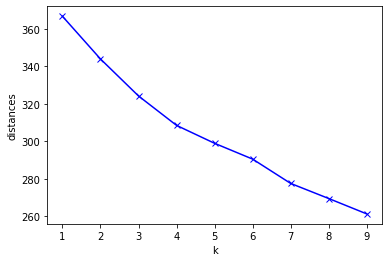

In [33]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
 
# Зададим количество кластеров от 1 до 9
clusters = range(1, 10) 
# Список расстояний между каждым объектом в каждом кластере
distances_sum = []

for k in clusters:
    kmeans_model = KMeans(n_clusters = k).fit(result_s)
    distances_point = cdist(result_s, kmeans_model.cluster_centers_, 'euclidean')
     # Извлечем минимальное расстояние от каждого объекта до центра его кластера и сложим их.
    distances_cluster = sum(np.min(distances_point,axis=1))
     # Запишем результаты расстояний диапазона (1, 10) 
    distances_sum.append(distances_cluster)
 
# Визуализируем полученные результаты
plt.plot(clusters, distances_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('distances')
plt.show()

Точка перегиба кривой находится между 4 и 6, тогда выберем оптимально 5 кластеров для метода к-средних.

In [34]:
# Исходя из тепловой карты уберем признаки дублирующие ВРП - rep_industry и rep_mining, а также d_resp дублирует общую заболеваемость
result_s = result_s[['population','cash_real','child_mort','disabled','grp','poverty_%','wes_%','retail','poverty_deti_%',
'poverty_pens_%','poverty_trud_%','rep_manufacture','rep_electro','unemployed','borned','drug','alco','d_blood',
'd_endo','d_all','square_liv']]
print(result_s.shape)

(85, 21)


In [35]:
from sklearn.cluster import KMeans
# Используем метод кластеризации KMeans
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(result_s)

y_kmeans = kmeans.predict(result_s)

# Pададим индекс для меток
result_s['labels'] = pd.Series(y_kmeans, index=result.index)
result_s['labels']


C:\Users\Admin\AppData\Local\Temp\ipykernel_13464\1051766612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_s['labels'] = pd.Series(y_kmeans, index=result.index)


Регион
Белгородская область            2
Брянская область                1
Владимирская область            1
Воронежская область             1
Ивановская область              1
                               ..
Амурская область                1
Магаданская область             2
Сахалинская область             2
Еврейская автономная область    1
Чукотский автономный округ      4
Name: labels, Length: 85, dtype: int32

In [36]:
# 0 Кластер
result[result_s['labels']==0].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.105715e+06,20422.800000,0.000147,1.152563,196533.360000,24.712000,24.488000,110410.880000,43.355000,6.145000,...,9.983463,0.076323,0.017926,5.313333,33.593333,25611.580000,3493.360000,1300.040000,68716.320000,19.500000
std,1.196488e+06,4556.066775,0.000022,0.225380,48278.481605,8.060479,4.858695,54819.840697,3.208066,2.128703,...,5.335079,0.037578,0.002820,4.436377,38.111850,9220.767046,1369.359479,508.640687,15629.989656,5.890671
min,2.178556e+05,16234.600000,0.000119,0.770696,134501.460000,14.300000,17.420000,49174.200000,39.800000,3.900000,...,2.414834,0.053862,0.015250,0.466667,0.100000,14313.900000,1962.700000,844.900000,52150.100000,13.600000
25%,3.215430e+05,16238.800000,0.000134,1.150676,157075.560000,19.920000,21.400000,73470.200000,39.900000,4.400000,...,6.382064,0.055513,0.015951,1.300000,3.550000,21872.900000,2498.200000,946.700000,60547.700000,14.400000
50%,4.891494e+05,19590.600000,0.000145,1.206696,220953.600000,24.620000,27.540000,115880.400000,45.375000,6.525000,...,13.110449,0.062915,0.016472,6.400000,14.850000,26023.800000,3535.000000,1162.500000,60756.500000,19.200000
75%,1.436339e+06,23454.800000,0.000159,1.310189,221798.320000,29.960000,27.600000,120855.000000,45.675000,6.650000,...,13.146285,0.066419,0.020928,7.233333,69.766667,26164.500000,4000.600000,1429.200000,80693.800000,22.500000
max,3.063686e+06,26595.200000,0.000177,1.324559,248337.860000,34.760000,28.480000,192674.600000,46.025000,9.250000,...,14.863683,0.142904,0.021028,11.166667,79.700000,39682.800000,5470.300000,2116.900000,89433.500000,27.800000


Кластер характеризуется х низкими значениями социально-экономических показателей, наблюдается высокий уровень безработицы, однако довольно большое стандартное отклонение в % людей живущих за чертой бедности.

In [37]:
# 1 Кластер
result[result_s['labels']==1].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,4.300000e+01,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.819535e+06,26511.032558,0.000056,0.962042,413435.956279,14.428372,23.343256,178131.525581,37.958721,6.017442,...,35.503622,0.028338,0.010244,12.737984,73.310078,38032.262791,3479.627907,1560.469767,85233.327907,15.506977
std,1.149987e+06,3932.513703,0.000015,0.172859,117855.045199,3.101183,2.014575,31124.193481,3.336076,1.486862,...,16.080202,0.005783,0.001061,11.829431,23.735289,7333.006727,993.459746,518.613537,13089.276020,5.284587
min,1.621138e+05,19075.400000,0.000035,0.623213,232553.000000,8.740000,19.940000,125712.200000,27.975000,3.250000,...,14.387151,0.020486,0.008422,1.600000,20.050000,23444.600000,2005.600000,707.300000,55009.900000,0.000000
25%,1.062477e+06,23462.800000,0.000048,0.832782,342070.850000,12.990000,21.900000,152405.900000,35.912500,5.212500,...,25.445933,0.024032,0.009312,5.700000,57.650000,31981.900000,2733.200000,1313.300000,74647.400000,15.900000
50%,1.329110e+06,25721.000000,0.000053,0.960336,405518.160000,14.000000,22.960000,176145.000000,38.825000,5.625000,...,33.125373,0.027105,0.010041,9.066667,74.800000,36795.300000,3358.700000,1523.900000,86241.900000,16.900000
75%,2.489341e+06,29177.000000,0.000063,1.078888,465117.430000,15.850000,24.840000,202194.600000,40.012500,6.875000,...,39.867061,0.032482,0.011106,17.500000,90.983333,44393.550000,4002.450000,1740.350000,93826.950000,17.850000
max,5.602373e+06,34628.600000,0.000124,1.420061,807521.720000,24.200000,27.820000,244479.800000,42.975000,10.200000,...,96.799642,0.042832,0.012804,68.400000,121.000000,53254.400000,6010.800000,3885.000000,112764.700000,24.100000


In [38]:
# 2 Кластер
result[result_s['labels']==2].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,1.700000e+01,17.000000,17.000000,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.838797e+06,42220.588235,0.000048,0.749627,9.433744e+05,10.536471,16.540000,244770.776471,34.848529,6.148529,...,56.068293,0.022963,0.010843,9.447059,71.562745,36544.252941,2633.288235,1219.635294,78406.864706,15.923529
std,3.216730e+06,11915.369479,0.000018,0.342792,5.433990e+05,3.441244,3.661625,50688.088304,11.095296,2.161388,...,32.605143,0.008817,0.002045,3.874938,42.132305,7002.155341,708.081228,398.093905,12206.231158,1.360390
min,1.434778e+05,27611.400000,0.000000,0.304881,4.832163e+05,6.880000,9.860000,169088.400000,12.625000,2.450000,...,14.280026,0.009411,0.005609,2.366667,17.800000,27195.700000,1453.400000,641.500000,64208.600000,13.800000
25%,9.651718e+05,31222.400000,0.000044,0.516107,5.787651e+05,7.680000,14.260000,222071.000000,28.350000,4.700000,...,37.135522,0.017431,0.010057,8.100000,44.200000,31723.900000,2228.600000,922.000000,67303.600000,15.400000
50%,1.549889e+06,41757.600000,0.000049,0.673879,7.678325e+05,9.480000,16.120000,234938.000000,39.650000,5.850000,...,43.438725,0.023385,0.011210,9.400000,60.033333,35126.100000,2471.200000,1140.800000,75548.600000,15.800000
75%,3.889957e+06,49194.800000,0.000058,0.912698,1.099324e+06,12.380000,19.060000,258347.800000,42.825000,7.975000,...,69.952639,0.027774,0.011932,11.166667,81.800000,38265.800000,3078.700000,1335.600000,83995.500000,17.000000
max,1.250212e+07,69847.000000,0.000078,1.605606,2.302429e+06,18.620000,22.480000,380821.800000,46.725000,9.775000,...,132.684523,0.039496,0.014188,17.866667,152.466667,53933.400000,3995.800000,1929.600000,104555.100000,18.100000


In [39]:
# 3 Кластер
result[result_s['labels']==3].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.578297e+05,23690.505882,0.000059,0.934311,306345.475294,16.670588,21.425882,154416.200000,36.626471,6.322059,...,24.264037,0.036799,0.010874,5.917647,55.229412,28805.894118,2636.929412,1184.905882,63057.470588,17.752941
std,6.074328e+05,3435.103552,0.000017,0.238327,95202.581315,4.738750,3.773140,36487.336559,5.308531,2.411931,...,14.139383,0.013364,0.001635,4.228148,21.037869,4974.853037,624.015167,395.142358,8094.952515,1.990012
min,2.751462e+05,17471.600000,0.000029,0.517974,186941.800000,10.100000,12.880000,77126.400000,25.025000,1.950000,...,6.654680,0.021193,0.008206,0.233333,24.050000,19422.400000,1357.300000,598.900000,44792.000000,13.700000
25%,6.361700e+05,20896.200000,0.000049,0.790835,262675.580000,12.980000,20.100000,147371.400000,34.850000,4.900000,...,15.215025,0.024721,0.009976,3.466667,44.600000,25916.100000,2240.300000,1015.700000,59172.300000,16.900000
50%,8.654210e+05,24231.400000,0.000053,0.903695,286322.820000,15.560000,21.960000,160778.200000,37.300000,5.550000,...,20.881114,0.034116,0.010983,5.133333,52.850000,29249.700000,2802.100000,1117.600000,64949.800000,18.300000
75%,1.072057e+06,26939.600000,0.000072,1.108592,321327.440000,19.480000,22.860000,178371.400000,40.175000,7.850000,...,28.270032,0.049304,0.011864,8.166667,69.066667,31947.600000,3013.000000,1324.600000,70723.500000,19.200000
max,2.801094e+06,28684.200000,0.000087,1.299572,532268.760000,24.620000,26.960000,205971.200000,43.875000,10.975000,...,58.534308,0.059635,0.014120,18.100000,95.133333,38090.100000,3616.800000,2068.900000,72233.000000,20.200000


In [40]:
# 4 Кластер
result[result_s['labels']==4].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.00000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,210907.533333,78757.466667,0.000096,0.494282,4.382699e+06,8.060000,11.620000,219741.000000,36.27500,1.283333,...,129.786744,0.026204,0.013585,0.477778,132.688889,65655.066667,2831.600000,2100.633333,128331.700000,16.833333
std,284086.498275,1290.450221,0.000056,0.264522,2.367392e+06,2.022968,4.578166,29061.661368,11.61704,0.752634,...,60.069042,0.014414,0.001405,0.416778,132.301715,5091.133102,274.986018,905.116481,9988.547194,3.590729
min,43942.400000,77620.000000,0.000055,0.301876,1.780297e+06,5.860000,6.480000,191623.800000,24.47500,0.675000,...,90.546914,0.014226,0.012132,0.000000,0.000000,60314.100000,2578.500000,1289.900000,118256.900000,14.100000
25%,46899.000000,78056.300000,0.000064,0.343459,3.369755e+06,7.170000,9.800000,204780.000000,30.56250,0.862500,...,95.210546,0.018205,0.012910,0.333333,66.733333,63256.200000,2685.300000,1612.350000,123381.700000,14.800000
50%,49855.600000,78492.600000,0.000074,0.385042,4.959213e+06,8.480000,13.120000,217936.200000,36.65000,1.050000,...,99.874177,0.022184,0.013688,0.666667,133.466667,66198.300000,2792.100000,1934.800000,128506.500000,15.500000
75%,294390.100000,79326.200000,0.000117,0.590485,5.683900e+06,9.160000,14.190000,233799.600000,42.17500,1.587500,...,149.406658,0.032192,0.014312,0.716667,199.033333,68325.550000,2958.150000,2506.000000,133369.100000,18.200000
max,538924.600000,80159.800000,0.000160,0.795928,6.408588e+06,9.840000,15.260000,249663.000000,47.70000,2.125000,...,198.939139,0.042201,0.014935,0.766667,264.600000,70452.800000,3124.200000,3077.200000,138231.700000,20.900000


Видно, что в  0 кластер попали регионы с самым низким показателем ВРП, среднедушевым доходом и уровнем безработицы. Остальные регионы распределены по таким же признакам, схожие показатели ВРП и бедности. При этом в 4 кластере, для которого характерны максимальные среднедушевые денежные доходы населения в РФ, видно что попали регионы с высокой детской смертностью и с самым высоким показателем алкоголизма на 100 тыс. человек населения.

In [41]:
# 4 Кластер
result[result_s['labels']==4]

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Ненецкий автономный округ,43942.4,77620.0,0.000055,0.795928,6408587.76,9.84,15.26,217936.2,36.650,2.125,...,90.546914,0.042201,0.014935,0.766667,133.466667,66198.3,2792.1,3077.2,138231.7,20.9
Ямало-Ненецкий автономный округ,538924.6,80159.8,0.000074,0.301876,4959212.88,5.86,13.12,249663.0,47.700,1.050,...,99.874177,0.014226,0.013688,0.000000,0.000000,60314.1,2578.5,1934.8,118256.9,15.5
Чукотский автономный округ,49855.6,78492.6,0.000160,0.385042,1780297.36,8.48,6.48,191623.8,24.475,0.675,...,198.939139,0.022184,0.012132,0.666667,264.600000,70452.8,3124.2,1289.9,128506.5,14.1


Рассматривая детально 4 кластер, видим, что Чукотский автономный округ, имеет самую высокую детсвую смертность при низкой рождаемости и установленном диагнозе алкоголизма, однако из-за экономической и промышленной деятельности в этом кластере меньше всего выделяют денег на социальную политику.

### Проверка гипотезы

Воспользуемся методом главных компонент, чтобы найти зависимость доли объясненной дисперсии от числа показателей социально-экономического развития регионов 

In [42]:
# Применение метода главных компонент Principal Component Analysis
from sklearn.decomposition import PCA 

# Скопируем признаки без меток
result_pca = result_s.drop(['labels'], axis=1)
result_pca

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,-0.112912,0.049595,-0.596219,2.676351,-0.053126,-1.332123,-1.480065,0.618007,-2.376185,0.113560,...,1.037320,-0.730272,-0.584715,-0.739064,-0.797684,-0.655921,0.915339,-1.169182,-0.308291,0.346547
Брянская область,-0.302540,-0.309473,-0.299811,0.606894,-0.365735,-0.109450,0.569803,0.437403,0.629383,-1.022044,...,-0.345032,-0.826922,-0.655252,-0.799224,0.016394,0.658348,0.085097,0.424609,-0.146699,1.822888
Владимирская область,-0.208882,-0.492124,-0.319109,0.731447,-0.305041,-0.250528,0.387996,-0.413564,-1.198065,-0.256745,...,0.448355,-0.427981,-0.343976,-0.821052,0.066163,0.001653,-0.422912,-0.299806,0.817951,-3.824702
Воронежская область,0.322823,0.004556,-0.712261,0.801452,-0.250749,-1.085237,-0.298323,0.968562,-0.171583,-0.269089,...,-0.258743,0.253190,-0.668691,-0.777712,1.289059,0.345803,1.835857,0.323927,-1.440377,-3.824702
Ивановская область,-0.411993,-0.425171,-0.741802,0.100959,-0.448051,-0.023236,1.297028,-0.392267,-1.454685,0.199965,...,-0.529119,-0.310988,-0.423075,-0.875442,-0.438636,0.344047,-0.273498,0.491988,0.489755,0.416849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Амурская область,-0.532481,0.062106,-0.124104,0.319952,-0.198536,0.305945,0.792516,0.633315,0.135583,-0.157997,...,-1.112101,0.383325,-0.133268,0.022610,1.153972,0.787404,-1.031854,-0.526776,0.197815,0.229377
Магаданская область,-0.897530,2.286959,-0.732205,-1.877965,0.874794,-0.814838,-2.093662,0.802862,-1.579107,0.311057,...,2.078255,2.594895,-0.063840,-0.422832,-0.047594,2.195612,-1.741102,-0.528123,-0.748061,-0.590812
Сахалинская область,-0.705023,1.847860,-0.404564,-1.458957,1.601612,-1.132263,-1.589149,2.379134,-1.365257,-0.120967,...,-0.686851,-0.056700,0.020921,0.628638,0.855358,1.345771,-0.931130,-0.227230,0.231470,0.205943


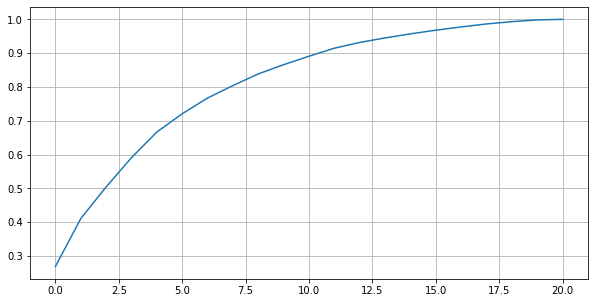

In [43]:
# Передадим признаки в метод
pca = PCA().fit(result_pca)
# Построим график зависимости доли объясненной дисперсии от числа индикаторов
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.gcf().set_size_inches(10,5)
plt.grid(True)

Из графика видим, что 90% объясненной дисперсии зависит всего от 10 признаков из используемых 21. Это скорее всего показатели : ВРП, объемов производства, среднедушевых доходов населения, потребления и бедности.

Для проверки гипотезы понизим размерность исходного набора данных и уберем из него показатели экономические показатели имеющие сильную корреляцию с ВРП: объемов производства,показатель потребления, доходы населения; с целью получения иной кластеризации, для выявления регионов, которые остро нуждаются в помощи бедным/неблагополучным слоям населения.  

In [44]:
# Понизим размерность признаков и оставим признаки связанные с социально-незащщенными слоями населения
result_gip = result_s[['population','child_mort','disabled','wes_%','poverty_deti_%',
'poverty_pens_%','poverty_trud_%','unemployed','borned','drug','alco','d_all','square_liv']]
print(result_gip.shape)

(85, 13)


In [45]:
# Снова выполним кластеризацию с новым набором признаков
kmeans = KMeans(n_clusters=5, random_state=42) 
kmeans.fit(result_gip)

y_kmeans = kmeans.predict(result_gip)

# Pададим индекс для меток
result_gip['labels'] = pd.Series(y_kmeans, index=result.index)
result_gip['labels']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13464\3168791792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_gip['labels'] = pd.Series(y_kmeans, index=result.index)


Регион
Белгородская область            4
Брянская область                2
Владимирская область            1
Воронежская область             1
Ивановская область              2
                               ..
Амурская область                2
Магаданская область             0
Сахалинская область             0
Еврейская автономная область    2
Чукотский автономный округ      0
Name: labels, Length: 85, dtype: int32

In [46]:
# 0 Кластер
result[result_gip['labels']==0].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.147584e+05,58104.400000,0.000064,0.501722,2.339664e+06,10.940000,13.175556,222808.377778,36.569444,3.702778,...,92.779172,0.026860,0.012574,7.685185,113.625926,46567.088889,2421.577778,1460.800000,95671.511111,15.722222
std,5.150705e+05,17789.569687,0.000044,0.154694,2.027223e+06,3.950506,2.762115,45836.603468,9.049040,2.127441,...,53.361332,0.009138,0.001674,7.114346,75.639547,16776.591859,801.529896,725.414637,28873.746452,2.329580
min,4.394240e+04,28684.200000,0.000000,0.301876,2.648348e+05,5.860000,6.480000,147442.200000,24.475000,0.675000,...,22.066343,0.014226,0.010057,0.000000,0.000000,23131.300000,1357.300000,598.900000,52350.600000,13.700000
25%,1.434778e+05,49194.800000,0.000041,0.385042,1.099324e+06,8.700000,12.880000,191623.800000,28.550000,2.125000,...,66.411916,0.022184,0.011294,0.766667,66.866667,36228.200000,2134.600000,1133.100000,77458.300000,13.900000
50%,4.348072e+05,54707.600000,0.000055,0.516107,1.780297e+06,9.840000,14.160000,225678.000000,36.650000,3.725000,...,90.546914,0.023950,0.012549,8.133333,120.200000,41421.500000,2228.600000,1289.900000,90676.100000,15.500000
75%,5.389246e+05,77620.000000,0.000077,0.552498,2.302429e+06,11.200000,14.860000,247378.800000,45.200000,5.425000,...,117.042842,0.032053,0.013688,11.166667,149.600000,60314.100000,2792.100000,1741.800000,118256.900000,16.500000
max,1.653276e+06,80159.800000,0.000160,0.795928,6.408588e+06,18.620000,15.520000,307109.800000,47.700000,6.575000,...,198.939139,0.042201,0.014935,18.100000,264.600000,70452.800000,3920.700000,3077.200000,138231.700000,20.900000


In [47]:
# 1 Кластер
result[result_gip['labels']==1].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,2.800000e+01,28.000000,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3.040665e+06,29925.514286,0.000058,0.792151,5.024729e+05,13.277143,21.845714,198230.985714,40.448214,5.657143,...,38.245016,0.027635,0.010700,11.147619,52.408333,34041.478571,3164.435714,1400.371429,76180.500000,14.521429
std,2.425524e+06,9808.320648,0.000013,0.185608,2.342034e+05,3.332599,3.545743,55739.455183,3.118129,1.429547,...,18.201289,0.008030,0.001477,8.438499,18.750009,6899.970039,1023.248914,412.130450,12844.438668,6.172481
min,5.364782e+05,20896.200000,0.000024,0.304881,2.271272e+05,7.000000,12.500000,132196.200000,29.625000,3.250000,...,14.280026,0.009411,0.005609,0.300000,20.050000,23444.600000,1482.100000,706.400000,52086.600000,0.000000
25%,1.477773e+06,24088.950000,0.000049,0.676524,3.718427e+05,11.770000,20.225000,156768.150000,39.425000,4.850000,...,27.000261,0.025250,0.009935,5.766667,39.908333,29526.850000,2482.450000,1188.900000,64668.250000,15.475000
50%,2.605442e+06,27894.000000,0.000058,0.780553,4.422943e+05,13.450000,22.170000,181670.600000,40.287500,5.462500,...,34.749177,0.027208,0.010969,9.450000,55.225000,32028.400000,2788.200000,1401.950000,76293.600000,16.750000
75%,3.739752e+06,31488.950000,0.000064,0.899837,5.364575e+05,14.665000,23.455000,226471.500000,42.075000,5.962500,...,39.857245,0.032841,0.011648,14.425000,63.050000,36952.400000,3628.550000,1623.450000,86080.350000,17.825000
max,1.250212e+07,69847.000000,0.000087,1.117401,1.434221e+06,19.480000,27.160000,380821.800000,46.575000,9.775000,...,96.799642,0.043254,0.014120,41.900000,83.433333,47827.900000,6010.800000,2281.300000,99088.400000,19.200000


In [48]:
# 2 Кластер
result[result_gip['labels']==2].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.123604e+06,25723.705000,0.000055,1.023504,374476.180000,15.335500,22.652000,171232.635000,36.167500,6.710000,...,31.015387,0.031032,0.010212,10.189167,77.914167,36573.525000,3183.625000,1454.325000,80450.865000,17.280000
std,6.286950e+05,4516.687457,0.000016,0.166811,121946.271911,4.201312,2.930829,36788.897684,3.955284,1.998139,...,15.884622,0.010774,0.001261,11.109528,23.824732,7611.390172,888.900906,562.471404,15620.646131,1.978629
min,1.621138e+05,17471.600000,0.000029,0.600321,186941.800000,8.740000,9.860000,77126.400000,25.025000,1.950000,...,6.654680,0.020486,0.008206,0.233333,26.600000,19422.400000,1655.700000,641.500000,44792.000000,13.800000
25%,7.354555e+05,23200.400000,0.000048,0.915709,283934.565000,12.905000,21.790000,151060.600000,34.675000,5.387500,...,18.455060,0.023354,0.009281,4.850000,59.525000,31743.000000,2538.200000,1113.750000,70380.400000,15.950000
50%,1.021586e+06,25380.400000,0.000051,0.994370,342070.850000,14.320000,22.570000,174793.900000,36.812500,6.537500,...,30.236717,0.027439,0.010008,7.066667,77.750000,35629.350000,3052.550000,1349.950000,76493.800000,17.100000
75%,1.268545e+06,27838.400000,0.000060,1.136272,461671.275000,17.630000,24.430000,194817.600000,38.750000,7.881250,...,41.032301,0.036345,0.011097,10.733333,95.166667,42201.700000,3583.500000,1710.050000,91694.100000,18.425000
max,3.232060e+06,39189.200000,0.000124,1.420061,770613.300000,24.620000,27.820000,246843.000000,42.850000,10.975000,...,76.329160,0.059635,0.012804,68.400000,134.500000,53254.400000,5383.200000,3885.000000,112764.700000,24.100000


In [49]:
# 3 Кластер
result[result_gip['labels']==3].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.105715e+06,20422.800000,0.000147,1.152563,196533.360000,24.712000,24.488000,110410.880000,43.355000,6.145000,...,9.983463,0.076323,0.017926,5.313333,33.593333,25611.580000,3493.360000,1300.040000,68716.320000,19.500000
std,1.196488e+06,4556.066775,0.000022,0.225380,48278.481605,8.060479,4.858695,54819.840697,3.208066,2.128703,...,5.335079,0.037578,0.002820,4.436377,38.111850,9220.767046,1369.359479,508.640687,15629.989656,5.890671
min,2.178556e+05,16234.600000,0.000119,0.770696,134501.460000,14.300000,17.420000,49174.200000,39.800000,3.900000,...,2.414834,0.053862,0.015250,0.466667,0.100000,14313.900000,1962.700000,844.900000,52150.100000,13.600000
25%,3.215430e+05,16238.800000,0.000134,1.150676,157075.560000,19.920000,21.400000,73470.200000,39.900000,4.400000,...,6.382064,0.055513,0.015951,1.300000,3.550000,21872.900000,2498.200000,946.700000,60547.700000,14.400000
50%,4.891494e+05,19590.600000,0.000145,1.206696,220953.600000,24.620000,27.540000,115880.400000,45.375000,6.525000,...,13.110449,0.062915,0.016472,6.400000,14.850000,26023.800000,3535.000000,1162.500000,60756.500000,19.200000
75%,1.436339e+06,23454.800000,0.000159,1.310189,221798.320000,29.960000,27.600000,120855.000000,45.675000,6.650000,...,13.146285,0.066419,0.020928,7.233333,69.766667,26164.500000,4000.600000,1429.200000,80693.800000,22.500000
max,3.063686e+06,26595.200000,0.000177,1.324559,248337.860000,34.760000,28.480000,192674.600000,46.025000,9.250000,...,14.863683,0.142904,0.021028,11.166667,79.700000,39682.800000,5470.300000,2116.900000,89433.500000,27.800000


In [50]:
# 4 Кластер
result[result_gip['labels']==4].describe()

,population,cash_real,child_mort,disabled,grp,poverty_%,wes_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,3.000000e+00,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.00000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.899929e+06,35644.400000,0.000040,1.280574,688605.14000,7.826667,15.900000,233336.266667,15.916667,4.82500,...,45.059027,0.018760,0.009723,7.166667,33.077778,36032.933333,3323.033333,1249.566667,80929.900000,16.833333
std,2.107358e+06,7854.615448,0.000008,0.348435,166218.56783,1.027878,1.067146,24837.013735,5.316386,2.06322,...,30.907756,0.007332,0.002033,4.195368,13.681794,11607.945308,593.594848,516.976908,18254.628516,1.059874
min,1.549889e+06,30997.600000,0.000030,0.912698,578765.06000,6.880000,14.740000,216128.200000,12.625000,2.45000,...,17.286679,0.010379,0.007931,2.366667,17.800000,27195.700000,2873.100000,813.600000,66653.900000,15.700000
25%,1.685778e+06,31110.000000,0.000037,1.118058,592990.92000,7.280000,15.430000,219099.600000,12.850000,4.15000,...,28.410119,0.016144,0.008619,5.683333,27.516667,29459.800000,2986.650000,964.000000,70645.650000,16.350000
50%,1.821666e+06,31222.400000,0.000044,1.323418,607216.78000,7.680000,16.120000,222071.000000,13.075000,5.85000,...,39.533558,0.021910,0.009308,9.000000,37.233333,31723.900000,3100.200000,1114.400000,74637.400000,17.000000
75%,3.574949e+06,37967.800000,0.000044,1.464512,743525.18000,8.300000,16.480000,241940.300000,17.562500,6.01250,...,58.945201,0.022950,0.010620,9.566667,40.716667,40451.550000,3548.000000,1467.550000,88067.900000,17.400000
max,5.328232e+06,44713.200000,0.000044,1.605606,879833.58000,8.920000,16.840000,261809.600000,22.050000,6.17500,...,78.356845,0.023991,0.011932,10.133333,44.200000,49179.200000,3995.800000,1820.700000,101498.400000,17.800000


Новая кластеризация распределила регионы в первую очередь по социальным признакам таким как:
- количество инвалидов, 
- доля малоимущего населения трудового возраста и доля малоимущих детей, 
- процент безработных

Но она сохранила тенденцию, что в регионах с высоким ВРП, ниже уровень бедности и меньше социально-незащищенных групп. Гипотеза не подтвердилась.

### Выводы

Состав 0 кластера:

In [64]:
cluster_0 = list(result[result_gip['labels']==0].index)
print (', '.join(cluster_0))

Ненецкий автономный округ, г. Севастополь, Ханты-Мансийский автономный округ — Югра, Ямало-Ненецкий автономный округ, Республика Саха (Якутия), Камчатский край, Магаданская область, Сахалинская область, Чукотский автономный округ


Кластер 0 включает в себя регионы с минимальными расходами на социальную политику, с высоким оборотом розничной торговли, однако с самыми высокими показателями заболеваемости в целом, в т.ч. алкоголизмом, скорее всего это следствие тяжелых условий труда. Характерной особенностью данного кластера является минимальный показатель по инвалидности.

*Состав 1 кластера:*

In [65]:
cluster_1 = list(result[result_gip['labels']==1].index)
print (', '.join(cluster_1))

Владимирская область, Воронежская область, Московская область, г. Москва, Вологодская область, Мурманская область, Республика Крым, Краснодарский край, Астраханская область, Волгоградская область, Ростовская область, Ставропольский край, Республика Башкортостан, Республика Татарстан (Татарстан), Удмуртская Республика, Самарская область, Саратовская область, Свердловская область, Тюменская область, Челябинская область, Республика Хакасия, Красноярский край, Кемеровская область — Кузбасс, Новосибирская область, Омская область, Томская область, Республика Бурятия, Приморский край


*Состав 2 кластера:*

In [66]:
cluster_2 = list(result[result_gip['labels']==2].index)
print (', '.join(cluster_2))

Брянская область, Ивановская область, Калужская область, Костромская область, Курская область, Липецкая область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тверская область, Тульская область, Ярославская область, Республика Карелия, Республика Коми, Архангельская область, Калининградская область, Новгородская область, Псковская область, Республика Адыгея (Адыгея), Республика Калмыкия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Республика Марий Эл, Республика Мордовия, Чувашская Республика — Чувашия, Пермский край, Кировская область, Нижегородская область, Оренбургская область, Пензенская область, Ульяновская область, Курганская область, Алтайский край, Иркутская область, Забайкальский край, Хабаровский край, Амурская область, Еврейская автономная область


Кластеры 1 и 2 в целом похожи и занимают промежуточное место. Во 2-ом кластере экономическая составляющая хуже, что обусловливает бо’льшие расходы на социальную политику.

*Состав 3 кластера:*

In [67]:
cluster_3 = list(result[result_gip['labels']==3].index)
print (', '.join(cluster_3))

Республика Дагестан, Республика Ингушетия, Чеченская Республика, Республика Алтай, Республика Тыва (Тува)


Для кластера 3 характерны самые высокие показатели по уровням детской смертности, безработицы, детей в малоимущих семьях, а также людей, живущих за чертой бедности. Самый низкий показатель по обороту розничной торговли. Также отметим, что данный кластер получает самую большую долю расходов на социальную политику. Ключевой особенностью являются минимальные показатели наркомании, алкоголизма и заболеваемости в целом. ***Регионы именно этого кластера нуждаются в помощи в первую очередь.***

*Состав 4 кластера:*

In [68]:
cluster_4 = list(result[result_gip['labels']==4].index)
print (', '.join(cluster_4))

Белгородская область, Ленинградская область, г. Санкт-Петербург


Кластер 4 описывает районы с максимальным показателем оборота розничной торговли на душу населения, и, как следствие, с минимальным количеством людей, живущих за чертой бедности и детей в малоимущих семьях. Характерной особенностью данного кластера является максимальный показатель по инвалидности.

Нами также проанализировано расслоение общества по доходам в разрезе кластеров. Результаты показали, что в 0 и 1 кластерах очень ярко выраженное расслоение общества, а в 3 и 4 – не слишком заметное.

Установлено прямое влияние на уровень бедности в регионе числа детей, пенсионеров и других социально уязвимых групп. Можно показать на примере того же кластера 3: высокие показатели по количеству детей, живущих в малоимущих семьях, и пенсионеров, находящихся за чертой бедности.


Уровень бедности/социального неблагополучия оказался тесно связан с производством и потреблением в регионе, что и является **опровержением нашей гипотезы**.
Например, кластер 4, в котором максимальный показатель оборота розничной торговли на душу населения, и, как следствие, минимальное количество людей, живущих за чертой бедности и детей в малоимущих семьях. 